# **IMPORTS**

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.losses import MeanSquaredError
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from keras.layers import *
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# **DATA** **LOADING**

In [4]:
df = pd.read_excel("Cluster_Data_HDBSCAN.xlsx", "cluster4")

In [5]:
df.head()

,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,1.43,1.44,1.45,1.46,1.47,1.48,1.49,1.50,1.51,1.52
0,1.038189,1.042940,1.050455,1.051986,1.042848,1.044636,1.028453,1.062921,1.038071,1.053921,...,1.002004,1.003079,1.017664,1.002964,1.006845,1.017111,1.028811,1.000000,1.000701,1.000000
1,1.059892,1.067785,1.081516,1.080560,1.063593,1.069254,1.043453,1.100351,1.059097,1.082574,...,1.005694,1.003572,1.022371,1.003439,1.007942,1.028828,1.036840,1.001543,1.000952,1.002001
2,1.034006,1.040393,1.056593,1.041552,1.020535,1.036086,1.019623,1.064199,1.030923,1.038288,...,1.011734,1.000464,1.009029,1.000447,1.001033,1.033031,1.015923,1.005234,1.000248,1.008252
3,1.023853,1.029157,1.046919,1.029965,1.008532,1.033897,1.011901,1.043872,1.024890,1.015345,...,1.009425,1.017705,1.015442,1.018994,1.018788,1.045669,1.061714,1.044144,1.074928,1.050397
4,1.028510,1.033387,1.048408,1.039257,1.022222,1.043861,1.018127,1.046527,1.032144,1.024264,...,1.008028,1.017162,1.016747,1.017567,1.018752,1.040420,1.060885,1.041849,1.086985,1.053931


In [6]:
df.columns = df.columns.astype(str)

In [7]:
time = [i+1 for i in range(len(df))]
time = np.array(time)

In [8]:
n_future = 1
n_past = 5
col = 17
split = 0.8
span = col

In [9]:
actuals = df[:].to_numpy().astype('float64').T[col]
mu = np.mean(actuals)
sd = np.std(actuals)
min = np.min(actuals)
max = np.max(actuals)
actuals = (actuals-min) / (max-min)
# actuals = (actuals - mu) / sd**2

In [10]:
X = []
Y = []

for i in range(n_past, len(actuals) - n_future +1):
    X.append(actuals[i - n_past:i])
    Y.append(actuals[i + n_future - 1:i + n_future])

X, Y = np.array(X).astype('float64'), np.array(Y).astype('float64')

In [11]:
trainX = X[:int(len(X)*split)]
trainY = Y[:int(len(X)*split)]
trainX.shape, trainY.shape

((266, 5), (266, 1))

In [12]:
testX = X[int(len(X)*split):]
testY = Y[int(len(X)*split):]
testX.shape, testY.shape

((67, 5), (67, 1))

In [13]:
trainX = trainX.reshape(-1, n_past, 1)
trainY = trainY.reshape(-1,)

In [14]:
testX = testX.reshape(-1, n_past, 1)
testY = testY.reshape(-1,)

In [15]:
trainX.shape, trainY.shape

((266, 5, 1), (266,))

In [16]:
testX.shape, testY.shape

((67, 5, 1), (67,))

# **MODEL** **BUILDING**

In [17]:
model1 = Sequential()
model1.add(Input((n_past, 1)))
model1.add(LSTM(80))
model1.add(Dense(20, 'selu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 80)                26240     
                                                                 
 dense (Dense)               (None, 20)                1620      
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 27881 (108.91 KB)
Trainable params: 27881 (108.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
chp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Epoch 1/30
7/7 [==============================] - 11s 719ms/step - loss: 0.0580 - root_mean_squared_error: 0.2409 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0878
Epoch 2/30
7/7 [==============================] - 3s 500ms/step - loss: 0.0505 - root_mean_squared_error: 0.2248 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0752
Epoch 3/30
7/7 [==============================] - 3s 478ms/step - loss: 0.0429 - root_mean_squared_error: 0.2071 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0650
Epoch 4/30
7/7 [==============================] - 3s 557ms/step - loss: 0.0372 - root_mean_squared_error: 0.1929 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0579
Epoch 5/30
7/7 [==============================] - 4s 591ms/step - loss: 0.0320 - root_mean_squared_error: 0.1789 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0552
Epoch 6/30
7/7 [==============================] - 0s 12ms/step - loss: 0.0276 - root_mean_squared_error: 0.1662 - val_loss: 0.0032 - val_root_mean_sq

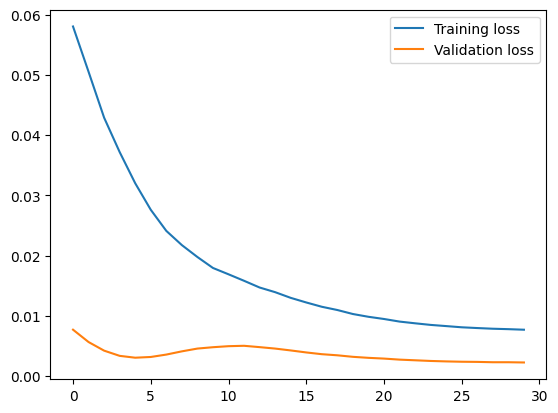

In [19]:
# fit the model
history = model1.fit(trainX, trainY, epochs=30, validation_split=0.20, callbacks = [chp1])

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [20]:
model1.save_weights("model_weights1.h5")

In [21]:
model2 = Sequential()
model2.add(Input((n_past, 1)))
model2.add(Conv1D(80, kernel_size = 2))
model2.add(MaxPooling1D(2))
model2.add(Flatten())
model2.add(Dense(20, 'selu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 80)             240       
                                                                 
 max_pooling1d (MaxPooling1  (None, 2, 80)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense_2 (Dense)             (None, 20)                3220      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 3481 (13.60 KB)
Trainable params: 3481 (13.60 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [22]:
chp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Epoch 1/30
7/7 [==============================] - 6s 138ms/step - loss: 0.0327 - root_mean_squared_error: 0.1808 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0586
Epoch 2/30
7/7 [==============================] - 1s 210ms/step - loss: 0.0213 - root_mean_squared_error: 0.1459 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0447
Epoch 3/30
7/7 [==============================] - 1s 163ms/step - loss: 0.0139 - root_mean_squared_error: 0.1180 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0421
Epoch 4/30
7/7 [==============================] - 0s 16ms/step - loss: 0.0100 - root_mean_squared_error: 0.0998 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0466
Epoch 5/30
7/7 [==============================] - 0s 27ms/step - loss: 0.0082 - root_mean_squared_error: 0.0905 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0519
Epoch 6/30
7/7 [==============================] - 0s 17ms/step - loss: 0.0075 - root_mean_squared_error: 0.0864 - val_loss: 0.0029 - val_root_mean_squar

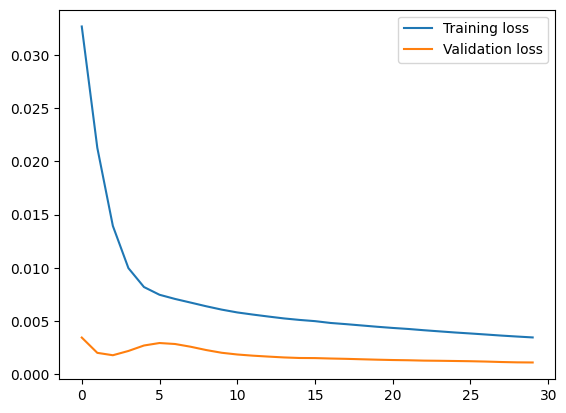

In [23]:
# fit the model
history = model2.fit(trainX, trainY, epochs=30, validation_split=0.20, callbacks = [chp2])

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [24]:
model2.save_weights("model_weights2.h5")

In [89]:
model3 = Sequential()
model3.add(Input((n_past, 1)))
model3.add(LSTM(80, return_sequences=True))
model3.add(LSTM(80, 'sigmoid', return_sequences=False))
model3.add(Flatten())
model3.add(Dense(40, 'selu'))
model3.add(Dense(15, 'selu'))
model3.add(Dense(1, 'linear'))

model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 5, 80)             26240     
                                                                 
 lstm_12 (LSTM)              (None, 80)                51520     
                                                                 
 flatten_7 (Flatten)         (None, 80)                0         
                                                                 
 dense_26 (Dense)            (None, 40)                3240      
                                                                 
 dense_27 (Dense)            (None, 15)                615       
                                                                 
 dense_28 (Dense)            (None, 1)                 16        
                                                                 
Total params: 81631 (318.87 KB)
Trainable params: 8163

In [90]:
chp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Epoch 1/30
7/7 [==============================] - 8s 763ms/step - loss: 0.3051 - root_mean_squared_error: 0.5523 - val_loss: 0.1519 - val_root_mean_squared_error: 0.3897
Epoch 2/30
7/7 [==============================] - 5s 900ms/step - loss: 0.0892 - root_mean_squared_error: 0.2987 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1354
Epoch 3/30
7/7 [==============================] - 4s 669ms/step - loss: 0.0457 - root_mean_squared_error: 0.2138 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0730
Epoch 4/30
7/7 [==============================] - 0s 21ms/step - loss: 0.0578 - root_mean_squared_error: 0.2404 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0810
Epoch 5/30
7/7 [==============================] - 4s 669ms/step - loss: 0.0514 - root_mean_squared_error: 0.2268 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0657
Epoch 6/30
7/7 [==============================] - 0s 21ms/step - loss: 0.0435 - root_mean_squared_error: 0.2085 - val_loss: 0.0118 - val_root_mean_squa

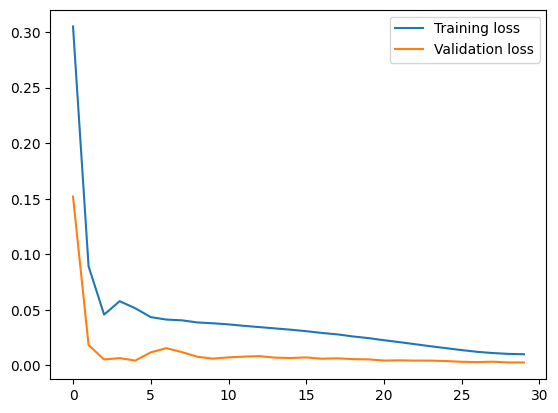

In [91]:
# fit the model
history = model3.fit(trainX, trainY, epochs=30, validation_split=0.20, callbacks = [chp3])

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [28]:
model3.save_weights("model_weights3.h5")

In [29]:
model4 = Sequential()
model4.add(Input((n_past, 1)))
model4.add(Conv1D(80, 3))
model4.add(Conv1D(60, 2, activation='sigmoid'))
model4.add(MaxPooling1D(2))
model4.add(LSTM(50, return_sequences=True))
model4.add(LSTM(50, 'sigmoid', return_sequences=False))
model4.add(Flatten())
model4.add(Dense(30, 'sigmoid'))
model4.add(Dense(10, 'selu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 3, 80)             320       
                                                                 
 conv1d_2 (Conv1D)           (None, 2, 60)             9660      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 60)             0         
 g1D)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 1, 50)             22200     
                                                                 
 lstm_4 (LSTM)               (None, 50)                20200     
                                                                 
 flatten_2 (Flatten)         (None, 50)                0         
                                                      

In [30]:
chp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Epoch 1/40
7/7 [==============================] - 11s 1s/step - loss: 0.0914 - root_mean_squared_error: 0.3023 - val_loss: 0.0148 - val_root_mean_squared_error: 0.1218
Epoch 2/40
7/7 [==============================] - 4s 710ms/step - loss: 0.0652 - root_mean_squared_error: 0.2553 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0726
Epoch 3/40
7/7 [==============================] - 5s 875ms/step - loss: 0.0496 - root_mean_squared_error: 0.2226 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0709
Epoch 4/40
7/7 [==============================] - 0s 28ms/step - loss: 0.0440 - root_mean_squared_error: 0.2098 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0955
Epoch 5/40
7/7 [==============================] - 0s 25ms/step - loss: 0.0439 - root_mean_squared_error: 0.2094 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1137
Epoch 6/40
7/7 [==============================] - 0s 24ms/step - loss: 0.0438 - root_mean_squared_error: 0.2093 - val_loss: 0.0129 - val_root_mean_squared

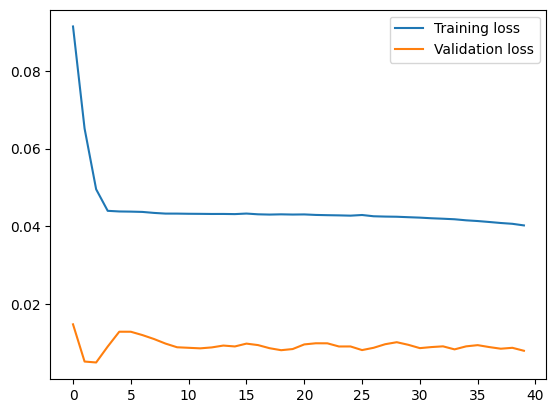

In [31]:
# fit the model
history = model4.fit(trainX, trainY, epochs=40, validation_split=0.20, callbacks = [chp4])

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [32]:
model4.save_weights("model_weights4.h5")

In [33]:
model5 = Sequential()
model5.add(Input((n_past, 1)))
model5.add(Flatten())
model5.add(Dense(90, 'selu'))
model5.add(Dense(80, 'sigmoid'))
model5.add(Dense(50, 'selu'))
model5.add(Dense(25, 'sigmoid'))
model5.add(Dense(15, 'selu'))
model5.add(Dense(5, 'relu'))
model5.add(Dense(1))

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 5)                 0         
                                                                 
 dense_10 (Dense)            (None, 90)                540       
                                                                 
 dense_11 (Dense)            (None, 80)                7280      
                                                                 
 dense_12 (Dense)            (None, 50)                4050      
                                                                 
 dense_13 (Dense)            (None, 25)                1275      
                                                                 
 dense_14 (Dense)            (None, 15)                390       
                                                                 
 dense_15 (Dense)            (None, 5)                

In [34]:
chp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Epoch 1/40
7/7 [==============================] - 4s 189ms/step - loss: 0.5754 - root_mean_squared_error: 0.7585 - val_loss: 0.5403 - val_root_mean_squared_error: 0.7350
Epoch 2/40
7/7 [==============================] - 1s 167ms/step - loss: 0.4250 - root_mean_squared_error: 0.6519 - val_loss: 0.3983 - val_root_mean_squared_error: 0.6311
Epoch 3/40
7/7 [==============================] - 1s 158ms/step - loss: 0.3108 - root_mean_squared_error: 0.5575 - val_loss: 0.2847 - val_root_mean_squared_error: 0.5335
Epoch 4/40
7/7 [==============================] - 1s 159ms/step - loss: 0.2210 - root_mean_squared_error: 0.4701 - val_loss: 0.1981 - val_root_mean_squared_error: 0.4451
Epoch 5/40
7/7 [==============================] - 1s 155ms/step - loss: 0.1580 - root_mean_squared_error: 0.3975 - val_loss: 0.1333 - val_root_mean_squared_error: 0.3651
Epoch 6/40
7/7 [==============================] - 2s 250ms/step - loss: 0.1134 - root_mean_squared_error: 0.3367 - val_loss: 0.0876 - val_root_mean_sq

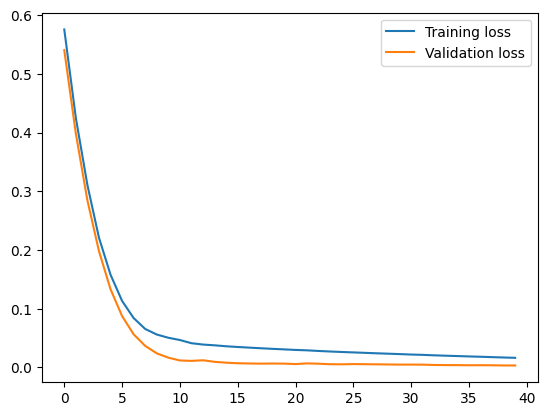

In [35]:
# fit the model
history = model5.fit(trainX, trainY, epochs=40, validation_split=0.20, callbacks = [chp5])

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [100]:
model5.save_weights("model_weights5.h5")

# **MODEL** **TESTING**

In [37]:
models = [model1, model2, model3, model4, model5]

In [92]:
Model_number = 3
model = models[Model_number-1]
wt_no = "model_weights" + str(Model_number) + ".h5"
model.load_weights(wt_no)
# type(model)

In [93]:
train_predictions = model.predict(trainX).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Original Train Predictions':trainY})
train_results

9/9 [==============================] - 0s 3ms/step


,Train Predictions,Original Train Predictions
0,0.138304,0.015912
1,0.138197,0.017903
2,0.137906,0.020157
3,0.138050,0.021364
4,0.138324,0.018818
...,...,...
261,0.160589,0.191741
262,0.162250,0.157643
263,0.161790,0.125912
264,0.159409,0.102268


from matplotlib import pyplot as plt
train_results['Train Predictions'].plot(kind='hist', bins=20, title='Train Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train_results['Original Train Predictions'].plot(kind='hist', bins=20, title='Original Train Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train_results.plot(kind='scatter', x='Train Predictions', y='Original Train Predictions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train_results['Train Predictions'].plot(kind='line', figsize=(8, 4), title='Train Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
train_results['Original Train Predictions'].plot(kind='line', figsize=(8, 4), title='Original Train Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

In [94]:
test_predictions = model.predict(testX).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':testY})
test_results

3/3 [==============================] - 0s 5ms/step


,Test Predictions,Actuals
0,0.152643,0.073586
1,0.149679,0.063231
2,0.147334,0.054370
3,0.145550,0.049632
4,0.144237,0.047300
...,...,...
62,0.136816,0.001954
63,0.136520,0.007692
64,0.136506,0.006705
65,0.136543,0.002682


from matplotlib import pyplot as plt
test_results['Test Predictions'].plot(kind='hist', bins=20, title='Test Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
test_results['Actuals'].plot(kind='hist', bins=20, title='Actuals')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
test_results.plot(kind='scatter', x='Test Predictions', y='Actuals', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
test_results['Test Predictions'].plot(kind='line', figsize=(8, 4), title='Test Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
test_results['Actuals'].plot(kind='line', figsize=(8, 4), title='Actuals')
plt.gca().spines[['top', 'right']].set_visible(False)

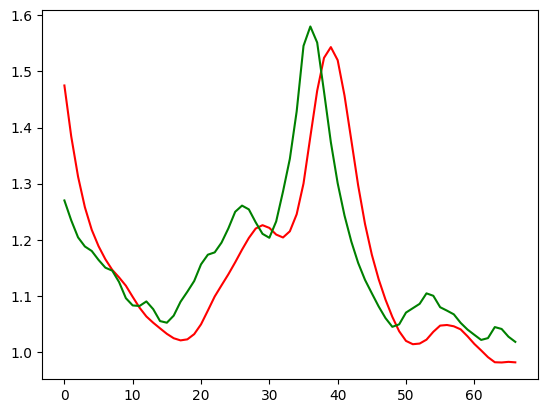

In [95]:
actY = testY*(max-min) + min
tp = (test_predictions - np.min(test_predictions))/(np.min(test_predictions)-np.max(test_predictions))
mx = np.max(actY)
mi = np.min(actY)
predY = mi + tp * (mx-mi)
plt.plot(2-predY, 'r')
plt.plot(actY, 'g')
plt.show()

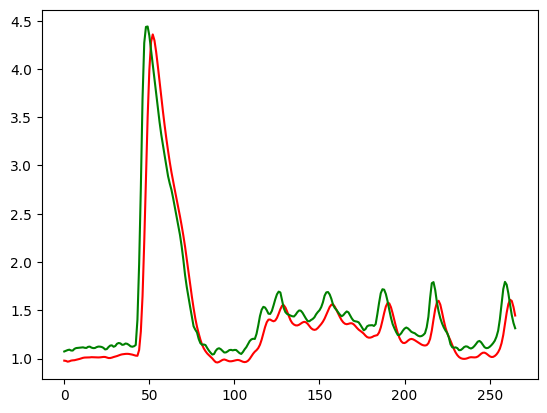

In [96]:
act2Y = trainY*(max-min) + min
tp2 = (train_predictions - np.min(train_predictions))/(np.min(train_predictions)-np.max(train_predictions))
mx = np.max(act2Y)
mi = np.min(act2Y)
predY2 = mi + tp2 * (mx-mi)
plt.plot(2-predY2, 'r')
plt.plot(act2Y, 'g')
plt.show()

In [97]:
len(predY2)+len(predY)

333

Text(0.5, 1.0, 'Data Column 17')

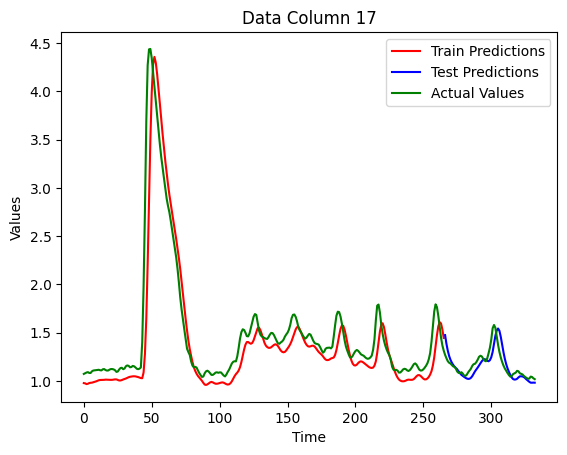

In [98]:
total = np.append(act2Y, actY)
time = [i for i in range(0, len(X))]
plt.plot(time[0 :len(predY2)], 2-predY2, 'r')
plt.plot(time[len(predY2):len(predY2)+len(predY)], 2-predY, 'b')
plt.plot(total, 'g')
plt.legend(['Train Predictions', 'Test Predictions', 'Actual Values'])
plt.xlabel('Time')
plt.ylabel('Values')
plt.title("Data Column {}".format(col))